# Business Case: Understanding profitability in the US finantial market. 

**Mariana Castro Payns - A01706038**

Analization of historical quarterly financial statements of all US public firms listed in the New York Exchange and NASDAQ. 

## Business Questions:



### 2.1 General Questions:

By industry, what is the composition of US public firms in terms of firm size, sales performance and profitability?

Why some firms are more profitable than others? Which factors/variables from financial statements are related to stock returns?

### 2.2 Specific Questions:

#### 2.2.1 About Descriptive Statistics

In [99]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
# Import data sets 
df = pd.read_csv('us2022q2a.csv')
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000.0,1.0
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,2679000.000,512000.000,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000.0,2.0
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,2925000.000,528000.000,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000.0,3.0
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,3160000.000,830000.000,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000.0,4.0
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,3667000.000,556000.000,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,11309.171,207.635,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021.0,3.0
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021.0,4.0
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022.0,1.0
324445,ZYNE,2022q2,0.0,0.0,9.168770e+03,0.0,-775.927860,-91.691,0.0,67006.959,9765.086,211.965,237.414,57241.873,1.140000,1.1400,43595.959,6.0,2022.0,2.0


In [101]:
# Get main info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324447 entries, 0 to 324446
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   firm               324446 non-null  object 
 1   q                  324446 non-null  object 
 2   revenue            158614 non-null  float64
 3   cogs               158309 non-null  float64
 4   sgae               158309 non-null  float64
 5   otheropexp         158311 non-null  float64
 6   extraincome        158613 non-null  float64
 7   finexp             158614 non-null  float64
 8   incometax          158614 non-null  float64
 9   totalassets        159808 non-null  float64
 10  totalliabilities   159808 non-null  float64
 11  shortdebt          129677 non-null  float64
 12  longdebt           159595 non-null  float64
 13  stockholderequity  159740 non-null  float64
 14  adjprice           159154 non-null  float64
 15  originalprice      159234 non-null  float64
 16  sh

In [102]:
# Define name of columns and delete the ones that we wont be using
columns = ["firm", "Name", "N", "Class", "Country of Origin", "Type of Asset", "Sector NAICS level 1", "Exchange / Src", "Sector Economatica", "Sector NAICS last available", "partind"]
firms = pd.read_csv("usfirms2022.csv", names=columns)
firms = firms.drop(["N", "Class", "Country of Origin", "Type of Asset", "Exchange / Src", "Sector Economatica", "Sector NAICS last available", "partind"], axis = 1)
firms

,firm,Name,Sector NAICS level 1
0,Ticker,Name,Sector NAICS\nlevel 1
1,FLWS,1 800 Flowers Com Inc,Retail Trade
2,TXG,"10x Genomics, Inc",Manufacturing
3,GOED,1847 Goedeker Inc,Retail Trade
4,ONEM,"1life Healthcare, Inc",Health Care and Social Assistance
...,...,...,...
3604,ZUO,"Zuora, Inc",Information
3605,ZWS,Zurn Elkay Water Solutions Corp,Manufacturing
3606,ZY,Zymergen Inc,"Professional, Scientific, and Technical Services"
3607,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [103]:
# Merge data sets to get all the information we need
df = df.merge(firms, how = 'left', on = 'firm')

In [104]:
# Define frequency of period (quarter for this case)
df['q'] = pd.PeriodIndex(df['q'], freq = "Q")
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS level 1
0,A,2000Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000.0,1.0,"Agilent Technologies, Inc",Manufacturing
1,A,2000Q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,...,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000.0,2.0,"Agilent Technologies, Inc",Manufacturing
2,A,2000Q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,...,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000.0,3.0,"Agilent Technologies, Inc",Manufacturing
3,A,2000Q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,...,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000.0,4.0,"Agilent Technologies, Inc",Manufacturing
4,A,2001Q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,...,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001.0,1.0,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021Q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,...,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021.0,3.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324443,ZYNE,2021Q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,...,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021.0,4.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324444,ZYNE,2022Q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,...,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022.0,1.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324445,ZYNE,2022Q2,0.0,0.0,9.168770e+03,0.0,-775.927860,-91.691,0.0,67006.959,...,237.414,57241.873,1.140000,1.1400,43595.959,6.0,2022.0,2.0,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [105]:
# Stablish firm and quatial as index with quartil frequency
df.set_index(['firm', 'q'], inplace=True)
df

revenue       cogs          sgae  otheropexp   extraincome  \
firm q                                                                      
A    2000Q1        NaN        NaN           NaN         NaN           NaN   
     2000Q2  2485000.0  1261000.0  1.010000e+06         0.0  42000.000000   
     2000Q3  2670000.0  1369000.0  1.091000e+06         0.0  28000.000000   
     2000Q4  3372000.0  1732000.0  1.182000e+06         0.0  10000.000000   
     2001Q1  2841000.0  1449000.0  1.113000e+06         0.0  -6000.000000   
...                ...        ...           ...         ...           ...   
ZYNE 2021Q3        0.0        0.0  1.021065e+04         0.0   -376.636750   
     2021Q4        0.0        0.0  8.836436e+03         0.0     16.937906   
     2022Q1        0.0        0.0  8.903915e+03         0.0    317.252110   
     2022Q2        0.0        0.0  9.168770e+03         0.0   -775.927860   
NaN  NaN           NaN        NaN           NaN         NaN           NaN   

             finexp  incometax  totalassets  totalliabilities   shortdebt  \
firm q                                                                      
A    2000Q1     NaN        NaN          NaN               NaN         NaN   
     2000Q2   0.000    90000.0  7321000.000       2679000.000  512000.000   
     2000Q3   0.000    83000.0  7827000.000       2925000.000  528000.000   
     2000Q4   0.000   163000.0  8425000.000       3160000.000  830000.000   
     2001Q1   0.000   119000.0  9208000.000       3667000.000  556000.000   
...             ...        ...          ...               ...         ...   
ZYNE 2021Q3  -5.038        0.0    89996.170         11309.171     207.635   
     2021Q4  -4.433        0.0    81171.507         10258.173     209.068   
     2022Q1 -96.044        0.0    74381.029          9214.059     210.512   
     2022Q2 -91.691        0.0    67006.959          9765.086     211.965   
NaN  NaN        NaN        NaN          NaN               NaN         NaN   

             longdebt  stockholderequity   adjprice  originalprice  \
firm q                                                               
A    2000Q1       NaN                NaN  63.761670       104.0000   
     2000Q2     0.000        4642000.000  45.215607        73.7500   
     2000Q3     0.000        4902000.000  30.003238        48.9375   
     2000Q4     0.000        5265000.000  33.566841        54.7500   
     2001Q1     0.000        5541000.000  18.840347        30.7300   
...               ...                ...        ...            ...   
ZYNE 2021Q3   411.237          78686.999   4.240000         4.2400   
     2021Q4   353.694          70913.334   2.880000         2.8800   
     2022Q1   295.754          65166.970   2.050000         2.0500   
     2022Q2   237.414          57241.873   1.140000         1.1400   
NaN  NaN          NaN                NaN        NaN            NaN   

             sharesoutstanding  fiscalmonth    year  cto  \
firm q                                                     
A    2000Q1         452000.000          NaN  2000.0  1.0   
     2000Q2         452271.967          6.0  2000.0  2.0   
     2000Q3         453014.579          9.0  2000.0  3.0   
     2000Q4         456366.381         12.0  2000.0  4.0   
     2001Q1         456769.737          3.0  2001.0  1.0   
...                        ...          ...     ...  ...   
ZYNE 2021Q3          41251.537          9.0  2021.0  3.0   
     2021Q4          41217.537         12.0  2021.0  4.0   
     2022Q1          42447.037          3.0  2022.0  1.0   
     2022Q2          43595.959          6.0  2022.0  2.0   
NaN  NaN                   NaN          NaN     NaN  NaN   

                                     Name Sector NAICS level 1  
firm q                                                          
A    2000Q1     Agilent Technologies, Inc        Manufacturing  
     2000Q2     Agilent Technologies, Inc        Manufacturing  
     2000Q3     Agilent Technologies, Inc        Manufactur

##### 1. Show how many firms by industry there are in the sample:

In [106]:
# Get data from commercial industry
commercial = df.loc[(df["Sector NAICS level 1"] == "Wholesale Trade") | (df["Sector NAICS level 1"] == "Retail Trade")]
commercial

revenue      cogs     sgae  otheropexp  extraincome  finexp  \
firm q                                                                      
AAP  2000Q1       NaN       NaN      NaN         NaN          NaN     NaN   
     2000Q2       NaN       NaN      NaN         NaN          NaN     NaN   
     2000Q3       NaN       NaN      NaN         NaN          NaN     NaN   
     2000Q4       NaN       NaN      NaN         NaN          NaN     NaN   
     2001Q1       NaN       NaN      NaN         NaN          NaN     NaN   
...               ...       ...      ...         ...          ...     ...   
ZUMZ 2021Q2  279069.0  175900.0  68889.0         0.0        254.0  -975.0   
     2021Q3  268666.0  163701.0  73011.0         0.0       -151.0  -965.0   
     2021Q4  289455.0  174791.0  74822.0         0.0        468.0  -893.0   
     2022Q1  346677.0  212744.0  82198.0         0.0      -1462.0  -759.0   
     2022Q2  220686.0  148312.0  71877.0         0.0        172.0  -492.0   

             incometax  totalassets  totalliabilities  shortdebt  longdebt  \
firm q                                                                       
AAP  2000Q1        NaN          NaN               NaN        NaN       NaN   
     2000Q2        NaN          NaN               NaN        NaN       NaN   
     2000Q3        NaN          NaN               NaN        NaN       NaN   
     2000Q4        NaN          NaN               NaN        NaN       NaN   
     2001Q1        NaN          NaN               NaN        NaN       NaN   
...                ...          ...               ...        ...       ...   
ZUMZ 2021Q2     9124.0    1017804.0          436023.0    67433.0  238553.0   
     2021Q3     8770.0    1030742.0          436446.0    65844.0  223043.0   
     2021Q4    10501.0     978189.0          446447.0    64389.0  220524.0   
     2022Q1    12828.0     862012.0          393694.0    63577.0  204309.0   
     2022Q2     1558.0     768114.0          391217.0    69327.0  207953.0   

             stockholderequity  adjprice  originalprice  sharesoutstanding  \
firm q                                                                       
AAP  2000Q1                NaN       NaN            NaN                NaN   
     2000Q2                NaN       NaN            NaN                NaN   
     2000Q3                NaN       NaN            NaN                NaN   
     2000Q4                NaN       NaN            NaN                NaN   
     2001Q1                NaN       NaN            NaN                NaN   
...                        ...       ...            ...                ...   
ZUMZ 2021Q2           581781.0     48.99          48.99          25781.021   
     2021Q3           594296.0     39.76          39.76          25164.434   
     2021Q4           531742.0     47.99          47.99          22977.833   
     2022Q1           468318.0     38.21          38.21          19922.279   
     2022Q2           376897.0     26.00          26.00          19459.555   

             fiscalmonth    year  cto                     Name  \
firm q                                                           
AAP  2000Q1          NaN  2000.0  1.0  Advance Auto Parts, Inc   
     2000Q2          NaN  2000.0  2.0  Advance Auto Parts, Inc   
     2000Q3          NaN  2000.0  3.0  Advance Auto Parts, Inc   
     2000Q4          NaN  2000.0  4.0  Advance Auto Parts, Inc   
     2001Q1          NaN  2001.0  1.0  Advance Auto Parts, Inc   
...                  ...     ...  ...                      ...   
ZUMZ 2021Q2          3.0  2021.0  2.0               Zumiez Inc   
     2021Q3          6.0  2021.0  3.0               Zumiez Inc   
     2021Q4          9.0  2021.0  4.0               Zumiez Inc   
     2022Q1         12.0  2022.0  1.0               Zumiez Inc   
     2022Q2          3.0  2022.0  2.0               Zumiez Inc   

            Sector NAICS level 1  
firm q                            
AAP  2000Q1         Retail Trade  
     2000Q2       

In [107]:
# Get data from services industry
services = df.loc[(df["Sector NAICS level 1"] == "Accommodation and Food Services") | (df["Sector NAICS level 1"] == "Administrative and Support and Waste Managment and Remedation Services") | (df["Sector NAICS level 1"] == "Arts, Entertainment, and Recreation") | (df["Sector NAICS level 1"] == "Educational Services") | (df["Sector NAICS level 1"] == "Health Care and Social Assistance") | (df["Sector NAICS level 1"] == "Information") | (df["Sector NAICS level 1"] == "Other Services (except Public Administration)") | (df["Sector NAICS level 1"] == "Profession, Scientific and Technical Services") | (df["Sector NAICS level 1"] == "Transportation and Warehousing")]
services

revenue     cogs       sgae  otheropexp  extraincome   finexp  \
firm q                                                                         
AAL  2000Q1  4577000.0      0.0  4365000.0         0.0      37000.0  49000.0   
     2000Q2  5011000.0      0.0  4494000.0         0.0      50000.0  45000.0   
     2000Q3  5256000.0      0.0  4684000.0         0.0     -15000.0  41000.0   
     2000Q4  4859000.0      0.0  4779000.0         0.0      30000.0  27000.0   
     2001Q1  4760000.0      0.0  4743000.0         0.0     -36000.0  38000.0   
...                ...      ...        ...         ...          ...      ...   
ZVO  2021Q2    69186.0  41229.0    30105.0      2341.0        232.0      0.0   
     2021Q3    62226.0  36936.0    30081.0       300.0        -69.0      0.0   
     2021Q4    54762.0  37543.0    26575.0     14335.0         40.0      0.0   
     2022Q1    61633.0  39829.0    29036.0         0.0       -127.0      0.0   
     2022Q2    51380.0  34995.0    26108.0     -8882.0      -3824.0      0.0   

             incometax  totalassets  totalliabilities  shortdebt   longdebt  \
firm q                                                                        
AAL  2000Q1    68000.0   24314000.0        17892000.0   472000.0  5544000.0   
     2000Q2   201000.0   25473000.0        18699000.0   742000.0  5395000.0   
     2000Q3   203000.0   25899000.0        18806000.0   768000.0  5198000.0   
     2000Q4    36000.0   26213000.0        19037000.0   796000.0  5474000.0   
     2001Q1   -14000.0   26534000.0        19301000.0   696000.0  5877000.0   
...                ...          ...               ...        ...        ...   
ZVO  2021Q2     -224.0     153895.0          106787.0        0.0        0.0   
     2021Q3       59.0     157775.0          114911.0        0.0        0.0   
     2021Q4      -47.0     149034.0          129028.0        0.0        0.0   
     2022Q1       78.0     148751.0          137484.0        0.0        0.0   
     2022Q2        8.0      85433.0           78828.0        0.0        0.0   

             stockholderequity  adjprice  originalprice  sharesoutstanding  \
firm q                                                                       
AAL  2000Q1          6422000.0       NaN            NaN         148583.186   
     2000Q2          6774000.0       NaN            NaN         149684.717   
     2000Q3          7093000.0       NaN            NaN         149957.759   
     2000Q4          7176000.0       NaN            NaN         150689.302   
     2001Q1          7233000.0       NaN            NaN         153619.329   
...                        ...       ...            ...                ...   
ZVO  2021Q2            47108.0    2.5900         2.5900          33328.550   
     2021Q3            42864.0    2.3900         2.3900          33417.762   
     2021Q4            20006.0    1.2700         1.2700          33459.695   
     2022Q1            11267.0    0.8201         0.8201          34054.879   
     2022Q2             6605.0    0.9701         0.9701          34095.968   

             fiscalmonth    year  cto                         Name  \
firm q                                                               
AAL  2000Q1          3.0  2000.0  1.0  American Airlines Group Inc   
     2000Q2          6.0  2000.0  2.0  American Airlines Group Inc   
     2000Q3          9.0  2000.0  3.0  American Airlines Group Inc   
     2000Q4         12.0  2000.0  4.0  American Airlines Group Inc   
     2001Q1          3.0  2001.0  1.0  American Airlines Group Inc   
...                  ...     ...  ...                          ...   
ZVO  2021Q2          6.0  2021.0  2.0                    Zovio Inc   
     2021Q3          9.0  2021.0  3.0                    Zovio Inc   
     2021Q4         12.0  2021.0  4.0                    Zovio Inc   
     2022Q1          3.0  2022.0  1.0                    Zovio Inc   
     2022Q2          6.0  2022.0  2.0                    Zovio Inc   

                    

In [108]:
# Get finantial services industry data
finantial_services = df.loc[(df["Sector NAICS level 1"] == "Finance and Insurance") | (df["Sector NAICS level 1"] == "Real Estate and Rental and Leasing")]
finantial_services

revenue     cogs  sgae  otheropexp  extraincome  finexp  \
firm q                                                                  
AAIC 2000Q1       NaN      NaN   NaN         NaN          NaN     NaN   
     2000Q2       NaN      NaN   NaN         NaN          NaN     NaN   
     2000Q3       NaN      NaN   NaN         NaN          NaN     NaN   
     2000Q4       NaN      NaN   NaN         NaN          NaN     NaN   
     2001Q1       NaN      NaN   NaN         NaN          NaN     NaN   
...               ...      ...   ...         ...          ...     ...   
ZION 2021Q2  570000.0  15000.0   0.0         0.0    -100000.0     0.0   
     2021Q3  569000.0  14000.0   0.0         0.0    -244000.0     0.0   
     2021Q4  566000.0  13000.0   0.0         0.0    -284000.0     0.0   
     2022Q1  555000.0  11000.0   0.0         0.0    -289000.0     0.0   
     2022Q2  608000.0  15000.0   0.0         0.0    -333000.0     0.0   

             incometax  totalassets  totalliabilities  shortdebt   longdebt  \
firm q                                                                        
AAIC 2000Q1        NaN          NaN               NaN        NaN        NaN   
     2000Q2        NaN          NaN               NaN        NaN        NaN   
     2000Q3        NaN          NaN               NaN        NaN        NaN   
     2000Q4        NaN          NaN               NaN        NaN        NaN   
     2001Q1        NaN          NaN               NaN        NaN        NaN   
...                ...          ...               ...        ...        ...   
ZION 2021Q2   101000.0   87208000.0        79175000.0        NaN  1308000.0   
     2021Q3    71000.0   88306000.0        80532000.0        NaN  1020000.0   
     2021Q4    56000.0   93200000.0        85737000.0        NaN  1012000.0   
     2022Q1    52000.0   91126000.0        84832000.0        NaN   689000.0   
     2022Q2    57000.0   87784000.0        82152000.0        NaN   671000.0   

             stockholderequity   adjprice  originalprice  sharesoutstanding  \
firm q                                                                        
AAIC 2000Q1                NaN  36.840768        10.8750                NaN   
     2000Q2                NaN  27.524712         8.1250                NaN   
     2000Q3                NaN  31.547554         9.3125                NaN   
     2000Q4                NaN  22.231498         6.5625                NaN   
     2001Q1                NaN  18.564359         5.4800                NaN   
...                        ...        ...            ...                ...   
ZION 2021Q2          8033000.0  51.206987        52.8600         163815.613   
     2021Q3          7774000.0  60.369290        61.8900         162070.463   
     2021Q4          7463000.0  61.968365        63.1600         156463.463   
     2022Q1          6294000.0  64.653705        65.5600         151574.325   
     2022Q2          5632000.0  50.546228        50.9000         151358.748   

             fiscalmonth    year  cto  \
firm q                                  
AAIC 2000Q1          NaN  2000.0  1.0   
     2000Q2          NaN  2000.0  2.0   
     2000Q3          NaN  2000.0  3.0   
     2000Q4          NaN  2000.0  4.0   
     2001Q1          NaN  2001.0  1.0   
...                  ...     ...  ...   
ZION 2021Q2          6.0  2021.0  2.0   
     2021Q3          9.0  2021.0  3.0   
     2021Q4         12.0  2021.0  4.0   
     2022Q1          3.0  2022.0  1.0   
     2022Q2          6.0  2022.0  2.0   

                                                   Name   Sector NAICS level 1  
firm q                                                                          
AAIC 2000Q1             Arlington Asset Investment Corp  Finance and Insurance  
     2000Q2             Arlington Asset Investment Corp  Finance and Insurance  
     2000Q3             Arlington Asset Investment Corp  Finance and Insurance  
     2000Q4             Arlington Asset Investment Corp  Finance and 

In [109]:
# Get manufacturing industry data
manufacturing = df.loc[(df["Sector NAICS level 1"] == "Manufacturing")]
manufacturing

revenue       cogs          sgae  otheropexp   extraincome  \
firm q                                                                      
A    2000Q1        NaN        NaN           NaN         NaN           NaN   
     2000Q2  2485000.0  1261000.0  1.010000e+06         0.0  42000.000000   
     2000Q3  2670000.0  1369000.0  1.091000e+06         0.0  28000.000000   
     2000Q4  3372000.0  1732000.0  1.182000e+06         0.0  10000.000000   
     2001Q1  2841000.0  1449000.0  1.113000e+06         0.0  -6000.000000   
...                ...        ...           ...         ...           ...   
ZYNE 2021Q2        0.0        0.0  9.838494e+03         0.0   -117.528220   
     2021Q3        0.0        0.0  1.021065e+04         0.0   -376.636750   
     2021Q4        0.0        0.0  8.836436e+03         0.0     16.937906   
     2022Q1        0.0        0.0  8.903915e+03         0.0    317.252110   
     2022Q2        0.0        0.0  9.168770e+03         0.0   -775.927860   

             finexp  incometax  totalassets  totalliabilities   shortdebt  \
firm q                                                                      
A    2000Q1     NaN        NaN          NaN               NaN         NaN   
     2000Q2   0.000    90000.0  7321000.000       2679000.000  512000.000   
     2000Q3   0.000    83000.0  7827000.000       2925000.000  528000.000   
     2000Q4   0.000   163000.0  8425000.000       3160000.000  830000.000   
     2001Q1   0.000   119000.0  9208000.000       3667000.000  556000.000   
...             ...        ...          ...               ...         ...   
ZYNE 2021Q2  -5.943        0.0    98195.904         10496.647     206.211   
     2021Q3  -5.038        0.0    89996.170         11309.171     207.635   
     2021Q4  -4.433        0.0    81171.507         10258.173     209.068   
     2022Q1 -96.044        0.0    74381.029          9214.059     210.512   
     2022Q2 -91.691        0.0    67006.959          9765.086     211.965   

             longdebt  stockholderequity   adjprice  originalprice  \
firm q                                                               
A    2000Q1       NaN                NaN  63.761670       104.0000   
     2000Q2     0.000        4642000.000  45.215607        73.7500   
     2000Q3     0.000        4902000.000  30.003238        48.9375   
     2000Q4     0.000        5265000.000  33.566841        54.7500   
     2001Q1     0.000        5541000.000  18.840347        30.7300   
...               ...                ...        ...            ...   
ZYNE 2021Q2   468.385          87699.257   5.290000         5.2900   
     2021Q3   411.237          78686.999   4.240000         4.2400   
     2021Q4   353.694          70913.334   2.880000         2.8800   
     2022Q1   295.754          65166.970   2.050000         2.0500   
     2022Q2   237.414          57241.873   1.140000         1.1400   

             sharesoutstanding  fiscalmonth    year  cto  \
firm q                                                     
A    2000Q1         452000.000          NaN  2000.0  1.0   
     2000Q2         452271.967          6.0  2000.0  2.0   
     2000Q3         453014.579          9.0  2000.0  3.0   
     2000Q4         456366.381         12.0  2000.0  4.0   
     2001Q1         456769.737          3.0  2001.0  1.0   
...                        ...          ...     ...  ...   
ZYNE 2021Q2          41251.537          6.0  2021.0  2.0   
     2021Q3          41251.537          9.0  2021.0  3.0   
     2021Q4          41217.537         12.0  2021.0  4.0   
     2022Q1          42447.037          3.0  2022.0  1.0   
     2022Q2          43595.959          6.0  2022.0  2.0   

                                     Name Sector NAICS level 1  
firm q                                                          
A    2000Q1     Agilent Technologies, Inc        Manufacturing  
     2000Q2     Agilent Technologies, Inc        Manufacturing  
     2000Q3     Agilent Technologies, Inc        Manufactur

In [110]:
# Group by firm and get the sum to get how many firms
c_firms = commercial.groupby(["firm"]).sum()
s_firms = services.groupby(["firm"]).sum()
f_firms = finantial_services.groupby(["firm"]).sum()
m_firms = manufacturing.groupby(["firm"]).sum()

In [111]:
# Print results
print("The Commercial Industry has a size of: ", c_firms.shape)
print("The Services Industry has a size of: ", s_firms.shape)
print("The Finantial Services Industry has a size of: ", f_firms.shape)
print("The Manifacturing Industry has a size of: ", m_firms.shape)

The Commercial Industry has a size of:  (231, 18)
The Services Industry has a size of:  (514, 18)
The Finantial Services Industry has a size of:  (769, 18)
The Manifacturing Industry has a size of:  (1565, 18)


> INTERPRETATION:
THIS MEANS COMMERCIAL INDUSTRY HAS A TOTAL OF 231 FIRMS; THE SERVICES INDUSTRY 514 FIRMS; THE FINANCIAL SERVICES 769 FIRMS AND THE MANUFACTURING INDUSTRY 1565 FIRMS

##### 2. For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed?

In [125]:
commercial = df.loc[(df["Sector NAICS level 1"] == "Wholesale Trade") | (df["Sector NAICS level 1"] == "Retail Trade")]
services = df.loc[(df["Sector NAICS level 1"] == "Accommodation and Food Services") | (df["Sector NAICS level 1"] == "Administrative and Support and Waste Managment and Remedation Services") | (df["Sector NAICS level 1"] == "Arts, Entertainment, and Recreation") | (df["Sector NAICS level 1"] == "Educational Services") | (df["Sector NAICS level 1"] == "Health Care and Social Assistance") | (df["Sector NAICS level 1"] == "Information") | (df["Sector NAICS level 1"] == "Other Services (except Public Administration)") | (df["Sector NAICS level 1"] == "Profession, Scientific and Technical Services") | (df["Sector NAICS level 1"] == "Transportation and Warehousing")]
finantial_services = df.loc[(df["Sector NAICS level 1"] == "Finance and Insurance") | (df["Sector NAICS level 1"] == "Real Estate and Rental and Leasing")]
manufacturing = df.loc[(df["Sector NAICS level 1"] == "Manufacturing")]

In [113]:
# Get Market Value
df["Market Value"] = df["originalprice"] * df["sharesoutstanding"]
df

revenue       cogs          sgae  otheropexp   extraincome  \
firm q                                                                      
A    2000Q1        NaN        NaN           NaN         NaN           NaN   
     2000Q2  2485000.0  1261000.0  1.010000e+06         0.0  42000.000000   
     2000Q3  2670000.0  1369000.0  1.091000e+06         0.0  28000.000000   
     2000Q4  3372000.0  1732000.0  1.182000e+06         0.0  10000.000000   
     2001Q1  2841000.0  1449000.0  1.113000e+06         0.0  -6000.000000   
...                ...        ...           ...         ...           ...   
ZYNE 2021Q3        0.0        0.0  1.021065e+04         0.0   -376.636750   
     2021Q4        0.0        0.0  8.836436e+03         0.0     16.937906   
     2022Q1        0.0        0.0  8.903915e+03         0.0    317.252110   
     2022Q2        0.0        0.0  9.168770e+03         0.0   -775.927860   
NaN  NaN           NaN        NaN           NaN         NaN           NaN   

             finexp  incometax  totalassets  totalliabilities   shortdebt  \
firm q                                                                      
A    2000Q1     NaN        NaN          NaN               NaN         NaN   
     2000Q2   0.000    90000.0  7321000.000       2679000.000  512000.000   
     2000Q3   0.000    83000.0  7827000.000       2925000.000  528000.000   
     2000Q4   0.000   163000.0  8425000.000       3160000.000  830000.000   
     2001Q1   0.000   119000.0  9208000.000       3667000.000  556000.000   
...             ...        ...          ...               ...         ...   
ZYNE 2021Q3  -5.038        0.0    89996.170         11309.171     207.635   
     2021Q4  -4.433        0.0    81171.507         10258.173     209.068   
     2022Q1 -96.044        0.0    74381.029          9214.059     210.512   
     2022Q2 -91.691        0.0    67006.959          9765.086     211.965   
NaN  NaN        NaN        NaN          NaN               NaN         NaN   

             ...  stockholderequity   adjprice  originalprice  \
firm q       ...                                                
A    2000Q1  ...                NaN  63.761670       104.0000   
     2000Q2  ...        4642000.000  45.215607        73.7500   
     2000Q3  ...        4902000.000  30.003238        48.9375   
     2000Q4  ...        5265000.000  33.566841        54.7500   
     2001Q1  ...        5541000.000  18.840347        30.7300   
...          ...                ...        ...            ...   
ZYNE 2021Q3  ...          78686.999   4.240000         4.2400   
     2021Q4  ...          70913.334   2.880000         2.8800   
     2022Q1  ...          65166.970   2.050000         2.0500   
     2022Q2  ...          57241.873   1.140000         1.1400   
NaN  NaN     ...                NaN        NaN            NaN   

             sharesoutstanding  fiscalmonth    year  cto  \
firm q                                                     
A    2000Q1         452000.000          NaN  2000.0  1.0   
     2000Q2         452271.967          6.0  2000.0  2.0   
     2000Q3         453014.579          9.0  2000.0  3.0   
     2000Q4         456366.381         12.0  2000.0  4.0   
     2001Q1         456769.737          3.0  2001.0  1.0   
...                        ...          ...     ...  ...   
ZYNE 2021Q3          41251.537          9.0  2021.0  3.0   
     2021Q4          41217.537         12.0  2021.0  4.0   
     2022Q1          42447.037          3.0  2022.0  1.0   
     2022Q2          43595.959          6.0  2022.0  2.0   
NaN  NaN                   NaN          NaN     NaN  NaN   

                                     Name Sector NAICS level 1  Market Value  
firm q                                                                        
A    2000Q1     Agilent Technologies, Inc        Manufacturing  4.700800e+07  
     2000Q2     Agilent Technologies, Inc        Manufacturing  3.335506e+07  
     2000Q3     Agilent Technologies, Inc        Manufacturing  2.21

In [114]:
mv = df["Market Value"].median()
print("Market Value of All Industries: ", mv)

Market Value of All Industries:  1576864.41918


In [118]:
# Get Market Value of Commercial industry
mv_c = commercial["Market Value"].median()
print("Market Value of Commercial industry: ", mv_c)

Market Value of Commercial industry:  2083817.9707199999


In [119]:
# Get Market Value of services industry
mv_s = services["Market Value"].median()
print("Market Value of Services industry: ", mv_s)

Market Value of Services industry:  2184463.5194800003


In [120]:
# Get Market Value of finantial services industry
mv_f = finantial_services["Market Value"].median()
print("Market Value of Finantial Services industry: ", mv_f)

Market Value of Finantial Services industry:  1563695.9379000003


In [121]:
# Get Market Value of Manufacturing industry
mv_m = manufacturing["Market Value"].median()
print("Market Value of Manufacturing industry: ", mv_m)

Market Value of Manufacturing industry:  1190025.10997


In [122]:
# Get Book Value
df["Book Value"] = df["totalassets"] - df["totalliabilities"]
df

revenue       cogs          sgae  otheropexp   extraincome  \
firm q                                                                      
A    2000Q1        NaN        NaN           NaN         NaN           NaN   
     2000Q2  2485000.0  1261000.0  1.010000e+06         0.0  42000.000000   
     2000Q3  2670000.0  1369000.0  1.091000e+06         0.0  28000.000000   
     2000Q4  3372000.0  1732000.0  1.182000e+06         0.0  10000.000000   
     2001Q1  2841000.0  1449000.0  1.113000e+06         0.0  -6000.000000   
...                ...        ...           ...         ...           ...   
ZYNE 2021Q3        0.0        0.0  1.021065e+04         0.0   -376.636750   
     2021Q4        0.0        0.0  8.836436e+03         0.0     16.937906   
     2022Q1        0.0        0.0  8.903915e+03         0.0    317.252110   
     2022Q2        0.0        0.0  9.168770e+03         0.0   -775.927860   
NaN  NaN           NaN        NaN           NaN         NaN           NaN   

             finexp  incometax  totalassets  totalliabilities   shortdebt  \
firm q                                                                      
A    2000Q1     NaN        NaN          NaN               NaN         NaN   
     2000Q2   0.000    90000.0  7321000.000       2679000.000  512000.000   
     2000Q3   0.000    83000.0  7827000.000       2925000.000  528000.000   
     2000Q4   0.000   163000.0  8425000.000       3160000.000  830000.000   
     2001Q1   0.000   119000.0  9208000.000       3667000.000  556000.000   
...             ...        ...          ...               ...         ...   
ZYNE 2021Q3  -5.038        0.0    89996.170         11309.171     207.635   
     2021Q4  -4.433        0.0    81171.507         10258.173     209.068   
     2022Q1 -96.044        0.0    74381.029          9214.059     210.512   
     2022Q2 -91.691        0.0    67006.959          9765.086     211.965   
NaN  NaN        NaN        NaN          NaN               NaN         NaN   

             ...   adjprice  originalprice  sharesoutstanding  fiscalmonth  \
firm q       ...                                                             
A    2000Q1  ...  63.761670       104.0000         452000.000          NaN   
     2000Q2  ...  45.215607        73.7500         452271.967          6.0   
     2000Q3  ...  30.003238        48.9375         453014.579          9.0   
     2000Q4  ...  33.566841        54.7500         456366.381         12.0   
     2001Q1  ...  18.840347        30.7300         456769.737          3.0   
...          ...        ...            ...                ...          ...   
ZYNE 2021Q3  ...   4.240000         4.2400          41251.537          9.0   
     2021Q4  ...   2.880000         2.8800          41217.537         12.0   
     2022Q1  ...   2.050000         2.0500          42447.037          3.0   
     2022Q2  ...   1.140000         1.1400          43595.959          6.0   
NaN  NaN     ...        NaN            NaN                NaN          NaN   

               year  cto                          Name  Sector NAICS level 1  \
firm q                                                                         
A    2000Q1  2000.0  1.0     Agilent Technologies, Inc         Manufacturing   
     2000Q2  2000.0  2.0     Agilent Technologies, Inc         Manufacturing   
     2000Q3  2000.0  3.0     Agilent Technologies, Inc         Manufacturing   
     2000Q4  2000.0  4.0     Agilent Technologies, Inc         Manufacturing   
     2001Q1  2001.0  1.0     Agilent Technologies, Inc         Manufacturing   
...             ...  ...                           ...                   ...   
ZYNE 2021Q3  2021.0  3.0  Zynerba Pharmaceuticals, Inc         Manufacturing   
     2021Q4  2021.0  4.0  Zynerba Pharmaceuticals, Inc         Manufacturing   
     2022Q1  2022.0  1.0  Zynerba Pharmaceuticals, Inc         Manufacturing   
     2022Q2  2022.0  2.0  Zynerba Pharmaceuticals, Inc         Manufacturing   
NaN  NaN        NaN  NaN            

In [123]:
bv = df["Book Value"].median()
print("Book Value of All Industries: ", bv)

Book Value of All Industries:  568889.0


In [126]:
# Get Book Value of Commercial industry
bv_c = commercial["Book Value"].median()
print("Book Value of Commercial industry: ", bv_c)

Book Value of Commercial industry:  723936.0


In [127]:
# Get Book Value of services industry
bv_s = services["Book Value"].median()
print("Book Value of Services industry: ", bv_s)

Book Value of Services industry:  544419.0


In [128]:
# Get Market Value of finantial services industry
bv_f = finantial_services["Book Value"].median()
print("Book Value of Finantial Services industry: ", bv_f)

Book Value of Finantial Services industry:  893833.0


In [129]:
# Get Book Value of Manufacturing industry
bv_m = manufacturing["Book Value"].median()
print("Book Value of Manufacturing industry: ", bv_m)

Book Value of Manufacturing industry:  363070.5


No handles with labels found to put in legend.


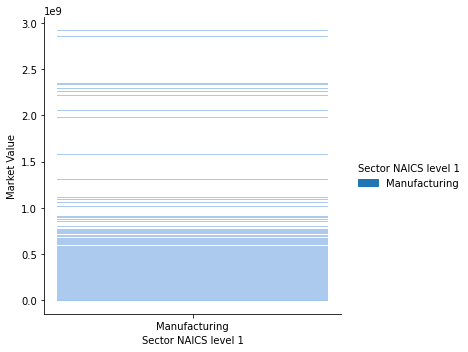

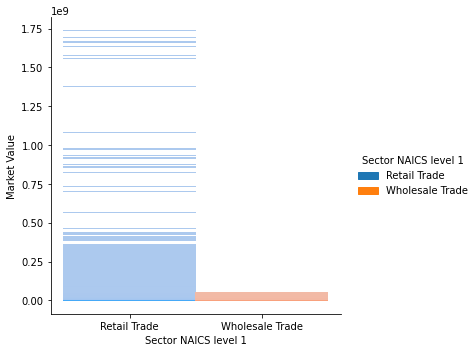

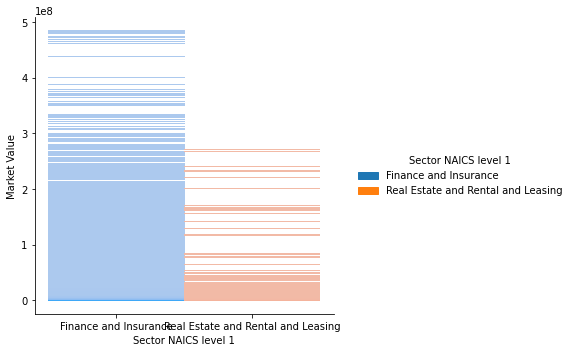

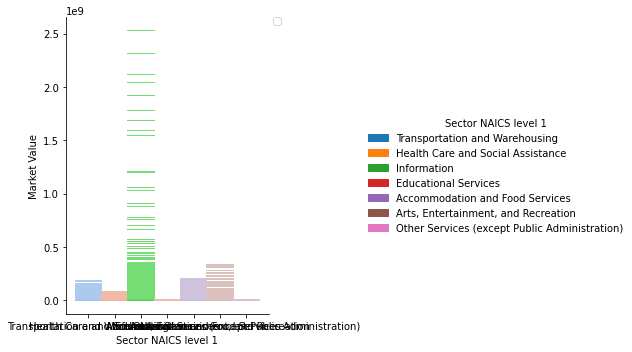

In [139]:
plot = sns.displot(x="Sector NAICS level 1",y="Market Value",data=manufacturing, hue="Sector NAICS level 1")
plot = sns.displot(x="Sector NAICS level 1",y="Market Value",data=commercial, hue="Sector NAICS level 1")
plot = sns.displot(x="Sector NAICS level 1",y="Market Value",data=finantial_services, hue="Sector NAICS level 1")
plot = sns.displot(x="Sector NAICS level 1",y="Market Value",data=services, hue="Sector NAICS level 1")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

No handles with labels found to put in legend.


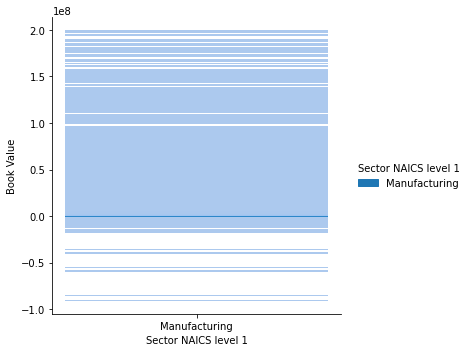

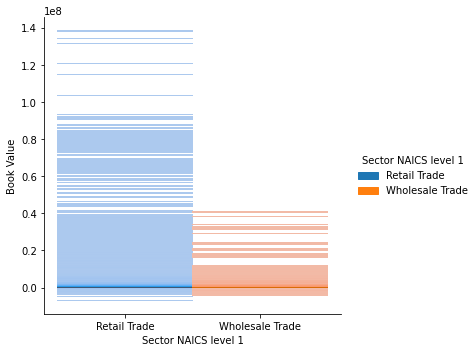

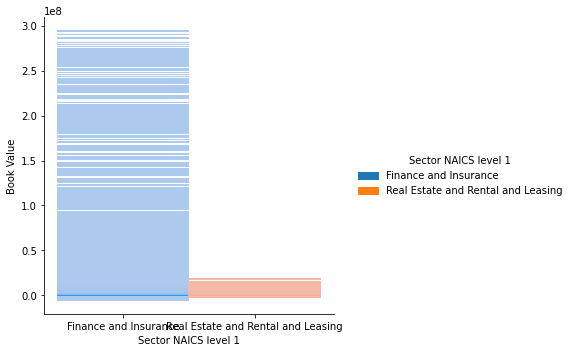

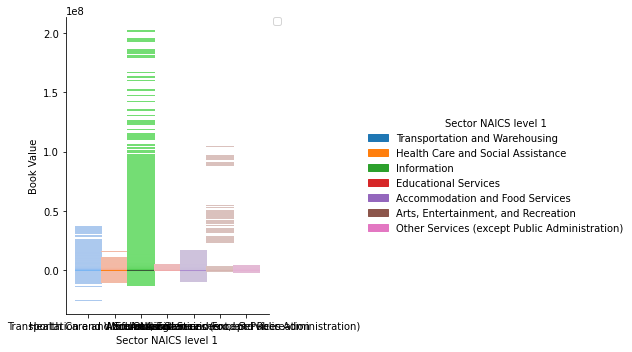

In [140]:
plot = sns.displot(x="Sector NAICS level 1",y="Book Value",data=manufacturing, hue="Sector NAICS level 1")
plot = sns.displot(x="Sector NAICS level 1",y="Book Value",data=commercial, hue="Sector NAICS level 1")
plot = sns.displot(x="Sector NAICS level 1",y="Book Value",data=finantial_services, hue="Sector NAICS level 1")
plot = sns.displot(x="Sector NAICS level 1",y="Book Value",data=services, hue="Sector NAICS level 1")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

> INTERPRETATION: 

THE CALCULATIONS MADE SHOWED THAT THE TYPICAL FIRM SIZE BASED ON MARKET VALUES FOR THE COMMERCIAL INDUSTRY IS AROUND 2,083,817.97 US DOLLARS; IN THE OTHER HAND FOR THE SERVICES INDUSTRY THE TYPICAL FIRM SIZE IS BASED ON A MARKET VALUE OF 2,184,463.51 US DOLLARS; THE FINANCIAL SERVICES SHOWED A TYPICAL FIRM SIZE BASEN ON MARKET VALUE IS 1,563,695,93; AND LASTLY THE MANUFACTURING INDUSTRY HAS A TYPICAL FIRM SIZED BASEN ON MARKET VALUE OF 1,190,025.10. 

AND FOR ALL INDUSTRIES THE MARKET VALUE IS 1,576,864.41 US DOLLARS. 

SAYING THIS, WE CAN SEE HOW THE SERVICES INDUSTRY HAS THE HIGHER MARKET VALUE AND THE MANUFACTURING INDUSTRY HAS THE LOWER MARKET VALUE. 

EVEN THOUGH THE VALUES ARE SIMILAR IT IS POSIBLE TO SEE A DIFFERENCE BETWEEN EACH INDUSTRY AND HOW THIS IS RELATED TO ITS FIRM SIZE. 

IN TERMS OF BOOK VALUE FOR THE COMMERCIAL INDUSTRY, THE TYPICIAL FIRM SIZE BASED ON IT IS 723,936 DOLLARS; THE SERVICES INDUSTRY HAS A VALUE OF 544,419 US DOLLARS IN TERMS OF TYPICIAL FIRM SIZED; THE FINANCIAL SERVICES INDUSTRY HAS A TYPICIAL FIRM SIZE BASED ON BOOK VALUE OF 893,833 US DOLLARS; AND LASTLY FOR THE MANUFACTURING INDUSTRY THE TYPICAL FIRM SIZED BASEN ON BOOK VALUE IS 363,070. 

AND THE MEDIAN OF BOOK VALUE FOR ALL FIRMS IS 569,899 US DOLLARS. 

WE CAN SEE HOW THE FINANCIAL SERVICES HAS THE HIGHER BOOK VALUE AND THE MANUFACTURING HAS THE LOWEST. 

THERE IS A DIFFERENCE BETWEEN INDUSTRIES, WHERE THE GAP BETWEEN THE HIGHEST AND LOWEST IS SIGNIFICANT. 

THE DISTRUBUTION IS SHOWED IN THE PLOTS ABOVE. 

##### 3. For each industry (and for all industries), what can you say about profit margin of firms? show a) descriptive statistics of profit margin and b) plot(s) to illustrate how profit margin changes across industries.

In [145]:
# Replace 0 values of revenue
df["revenue"] = df["revenue"].replace(0,np.nan)

In [146]:
# Get Earning Befire Interests and Taxes (Ebit)
df["Ebit"] = df["revenue"] - df["cogs"] - df["sgae"]
df

revenue       cogs          sgae  otheropexp   extraincome  \
firm q                                                                      
A    2000Q1        NaN        NaN           NaN         NaN           NaN   
     2000Q2  2485000.0  1261000.0  1.010000e+06         0.0  42000.000000   
     2000Q3  2670000.0  1369000.0  1.091000e+06         0.0  28000.000000   
     2000Q4  3372000.0  1732000.0  1.182000e+06         0.0  10000.000000   
     2001Q1  2841000.0  1449000.0  1.113000e+06         0.0  -6000.000000   
...                ...        ...           ...         ...           ...   
ZYNE 2021Q3        NaN        0.0  1.021065e+04         0.0   -376.636750   
     2021Q4        NaN        0.0  8.836436e+03         0.0     16.937906   
     2022Q1        NaN        0.0  8.903915e+03         0.0    317.252110   
     2022Q2        NaN        0.0  9.168770e+03         0.0   -775.927860   
NaN  NaN           NaN        NaN           NaN         NaN           NaN   

             finexp  incometax  totalassets  totalliabilities   shortdebt  \
firm q                                                                      
A    2000Q1     NaN        NaN          NaN               NaN         NaN   
     2000Q2   0.000    90000.0  7321000.000       2679000.000  512000.000   
     2000Q3   0.000    83000.0  7827000.000       2925000.000  528000.000   
     2000Q4   0.000   163000.0  8425000.000       3160000.000  830000.000   
     2001Q1   0.000   119000.0  9208000.000       3667000.000  556000.000   
...             ...        ...          ...               ...         ...   
ZYNE 2021Q3  -5.038        0.0    89996.170         11309.171     207.635   
     2021Q4  -4.433        0.0    81171.507         10258.173     209.068   
     2022Q1 -96.044        0.0    74381.029          9214.059     210.512   
     2022Q2 -91.691        0.0    67006.959          9765.086     211.965   
NaN  NaN        NaN        NaN          NaN               NaN         NaN   

             ...  originalprice  sharesoutstanding  fiscalmonth    year  cto  \
firm q       ...                                                               
A    2000Q1  ...       104.0000         452000.000          NaN  2000.0  1.0   
     2000Q2  ...        73.7500         452271.967          6.0  2000.0  2.0   
     2000Q3  ...        48.9375         453014.579          9.0  2000.0  3.0   
     2000Q4  ...        54.7500         456366.381         12.0  2000.0  4.0   
     2001Q1  ...        30.7300         456769.737          3.0  2001.0  1.0   
...          ...            ...                ...          ...     ...  ...   
ZYNE 2021Q3  ...         4.2400          41251.537          9.0  2021.0  3.0   
     2021Q4  ...         2.8800          41217.537         12.0  2021.0  4.0   
     2022Q1  ...         2.0500          42447.037          3.0  2022.0  1.0   
     2022Q2  ...         1.1400          43595.959          6.0  2022.0  2.0   
NaN  NaN     ...            NaN                NaN          NaN     NaN  NaN   

                                     Name  Sector NAICS level 1  Market Value  \
firm q                                                                          
A    2000Q1     Agilent Technologies, Inc         Manufacturing  4.700800e+07   
     2000Q2     Agilent Technologies, Inc         Manufacturing  3.335506e+07   
     2000Q3     Agilent Technologies, Inc         Manufacturing  2.216940e+07   
     2000Q4     Agilent Technologies, Inc         Manufacturing  2.498606e+07   
     2001Q1     Agilent Technologies, Inc         Manufacturing  1.403653e+07   
...                                   ...                   ...           ...   
ZYNE 2021Q3  Zynerba Pharmaceuticals, Inc         Manufacturing  1.749065e+05   
     2021Q4  Zynerba Pharmaceuticals, Inc         Manufacturing  1.187065e+05   
     2022Q1  Zynerba Pharmaceuticals, Inc         Manufacturing  8.701643e+04   
     2022Q2  Zynerba Pharmaceuticals, Inc         Manufacturing  4.969939e+04  

In [147]:
# Get Operating Profit Margin
df["OPM"] = df["Ebit"]/df["revenue"]
df

revenue       cogs          sgae  otheropexp   extraincome  \
firm q                                                                      
A    2000Q1        NaN        NaN           NaN         NaN           NaN   
     2000Q2  2485000.0  1261000.0  1.010000e+06         0.0  42000.000000   
     2000Q3  2670000.0  1369000.0  1.091000e+06         0.0  28000.000000   
     2000Q4  3372000.0  1732000.0  1.182000e+06         0.0  10000.000000   
     2001Q1  2841000.0  1449000.0  1.113000e+06         0.0  -6000.000000   
...                ...        ...           ...         ...           ...   
ZYNE 2021Q3        NaN        0.0  1.021065e+04         0.0   -376.636750   
     2021Q4        NaN        0.0  8.836436e+03         0.0     16.937906   
     2022Q1        NaN        0.0  8.903915e+03         0.0    317.252110   
     2022Q2        NaN        0.0  9.168770e+03         0.0   -775.927860   
NaN  NaN           NaN        NaN           NaN         NaN           NaN   

             finexp  incometax  totalassets  totalliabilities   shortdebt  \
firm q                                                                      
A    2000Q1     NaN        NaN          NaN               NaN         NaN   
     2000Q2   0.000    90000.0  7321000.000       2679000.000  512000.000   
     2000Q3   0.000    83000.0  7827000.000       2925000.000  528000.000   
     2000Q4   0.000   163000.0  8425000.000       3160000.000  830000.000   
     2001Q1   0.000   119000.0  9208000.000       3667000.000  556000.000   
...             ...        ...          ...               ...         ...   
ZYNE 2021Q3  -5.038        0.0    89996.170         11309.171     207.635   
     2021Q4  -4.433        0.0    81171.507         10258.173     209.068   
     2022Q1 -96.044        0.0    74381.029          9214.059     210.512   
     2022Q2 -91.691        0.0    67006.959          9765.086     211.965   
NaN  NaN        NaN        NaN          NaN               NaN         NaN   

             ...  sharesoutstanding  fiscalmonth    year  cto  \
firm q       ...                                                
A    2000Q1  ...         452000.000          NaN  2000.0  1.0   
     2000Q2  ...         452271.967          6.0  2000.0  2.0   
     2000Q3  ...         453014.579          9.0  2000.0  3.0   
     2000Q4  ...         456366.381         12.0  2000.0  4.0   
     2001Q1  ...         456769.737          3.0  2001.0  1.0   
...          ...                ...          ...     ...  ...   
ZYNE 2021Q3  ...          41251.537          9.0  2021.0  3.0   
     2021Q4  ...          41217.537         12.0  2021.0  4.0   
     2022Q1  ...          42447.037          3.0  2022.0  1.0   
     2022Q2  ...          43595.959          6.0  2022.0  2.0   
NaN  NaN     ...                NaN          NaN     NaN  NaN   

                                     Name  Sector NAICS level 1  Market Value  \
firm q                                                                          
A    2000Q1     Agilent Technologies, Inc         Manufacturing  4.700800e+07   
     2000Q2     Agilent Technologies, Inc         Manufacturing  3.335506e+07   
     2000Q3     Agilent Technologies, Inc         Manufacturing  2.216940e+07   
     2000Q4     Agilent Technologies, Inc         Manufacturing  2.498606e+07   
     2001Q1     Agilent Technologies, Inc         Manufacturing  1.403653e+07   
...                                   ...                   ...           ...   
ZYNE 2021Q3  Zynerba Pharmaceuticals, Inc         Manufacturing  1.749065e+05   
     2021Q4  Zynerba Pharmaceuticals, Inc         Manufacturing  1.187065e+05   
     2022Q1  Zynerba Pharmaceuticals, Inc         Manufacturing  8.701643e+04   
     2022Q2  Zynerba Pharmaceuticals, Inc         Manufacturing  4.969939e+04   
NaN  NaN                              NaN                   NaN           NaN   

              Book Value      Ebit       OPM  
firm q                                        
A    2000Q1      

In [148]:
# Get Net Income
df["Net Income"] = df["Ebit"] - df["incometax"] - df["finexp"] + df["extraincome"]
df

revenue       cogs          sgae  otheropexp   extraincome  \
firm q                                                                      
A    2000Q1        NaN        NaN           NaN         NaN           NaN   
     2000Q2  2485000.0  1261000.0  1.010000e+06         0.0  42000.000000   
     2000Q3  2670000.0  1369000.0  1.091000e+06         0.0  28000.000000   
     2000Q4  3372000.0  1732000.0  1.182000e+06         0.0  10000.000000   
     2001Q1  2841000.0  1449000.0  1.113000e+06         0.0  -6000.000000   
...                ...        ...           ...         ...           ...   
ZYNE 2021Q3        NaN        0.0  1.021065e+04         0.0   -376.636750   
     2021Q4        NaN        0.0  8.836436e+03         0.0     16.937906   
     2022Q1        NaN        0.0  8.903915e+03         0.0    317.252110   
     2022Q2        NaN        0.0  9.168770e+03         0.0   -775.927860   
NaN  NaN           NaN        NaN           NaN         NaN           NaN   

             finexp  incometax  totalassets  totalliabilities   shortdebt  \
firm q                                                                      
A    2000Q1     NaN        NaN          NaN               NaN         NaN   
     2000Q2   0.000    90000.0  7321000.000       2679000.000  512000.000   
     2000Q3   0.000    83000.0  7827000.000       2925000.000  528000.000   
     2000Q4   0.000   163000.0  8425000.000       3160000.000  830000.000   
     2001Q1   0.000   119000.0  9208000.000       3667000.000  556000.000   
...             ...        ...          ...               ...         ...   
ZYNE 2021Q3  -5.038        0.0    89996.170         11309.171     207.635   
     2021Q4  -4.433        0.0    81171.507         10258.173     209.068   
     2022Q1 -96.044        0.0    74381.029          9214.059     210.512   
     2022Q2 -91.691        0.0    67006.959          9765.086     211.965   
NaN  NaN        NaN        NaN          NaN               NaN         NaN   

             ...  fiscalmonth    year  cto                          Name  \
firm q       ...                                                           
A    2000Q1  ...          NaN  2000.0  1.0     Agilent Technologies, Inc   
     2000Q2  ...          6.0  2000.0  2.0     Agilent Technologies, Inc   
     2000Q3  ...          9.0  2000.0  3.0     Agilent Technologies, Inc   
     2000Q4  ...         12.0  2000.0  4.0     Agilent Technologies, Inc   
     2001Q1  ...          3.0  2001.0  1.0     Agilent Technologies, Inc   
...          ...          ...     ...  ...                           ...   
ZYNE 2021Q3  ...          9.0  2021.0  3.0  Zynerba Pharmaceuticals, Inc   
     2021Q4  ...         12.0  2021.0  4.0  Zynerba Pharmaceuticals, Inc   
     2022Q1  ...          3.0  2022.0  1.0  Zynerba Pharmaceuticals, Inc   
     2022Q2  ...          6.0  2022.0  2.0  Zynerba Pharmaceuticals, Inc   
NaN  NaN     ...          NaN     NaN  NaN                           NaN   

             Sector NAICS level 1  Market Value   Book Value      Ebit  \
firm q                                                                   
A    2000Q1         Manufacturing  4.700800e+07          NaN       NaN   
     2000Q2         Manufacturing  3.335506e+07  4642000.000  214000.0   
     2000Q3         Manufacturing  2.216940e+07  4902000.000  210000.0   
     2000Q4         Manufacturing  2.498606e+07  5265000.000  458000.0   
     2001Q1         Manufacturing  1.403653e+07  5541000.000  279000.0   
...                           ...           ...          ...       ...   
ZYNE 2021Q3         Manufacturing  1.749065e+05    78686.999       NaN   
     2021Q4         Manufacturing  1.187065e+05    70913.334       NaN   
     2022Q1         Manufacturing  8.701643e+04    65166.970       NaN   
     2022Q2         Manufacturing  4.969939e+04    57241.873       NaN   
NaN  NaN                      NaN           NaN          NaN       NaN   

                  OPM Net Income  
firm q                  

In [149]:
# Get Prfit Margin
df["Profit Margin"] = (df["Net Income"] / df["revenue"]) * 100
df

revenue       cogs          sgae  otheropexp   extraincome  \
firm q                                                                      
A    2000Q1        NaN        NaN           NaN         NaN           NaN   
     2000Q2  2485000.0  1261000.0  1.010000e+06         0.0  42000.000000   
     2000Q3  2670000.0  1369000.0  1.091000e+06         0.0  28000.000000   
     2000Q4  3372000.0  1732000.0  1.182000e+06         0.0  10000.000000   
     2001Q1  2841000.0  1449000.0  1.113000e+06         0.0  -6000.000000   
...                ...        ...           ...         ...           ...   
ZYNE 2021Q3        NaN        0.0  1.021065e+04         0.0   -376.636750   
     2021Q4        NaN        0.0  8.836436e+03         0.0     16.937906   
     2022Q1        NaN        0.0  8.903915e+03         0.0    317.252110   
     2022Q2        NaN        0.0  9.168770e+03         0.0   -775.927860   
NaN  NaN           NaN        NaN           NaN         NaN           NaN   

             finexp  incometax  totalassets  totalliabilities   shortdebt  \
firm q                                                                      
A    2000Q1     NaN        NaN          NaN               NaN         NaN   
     2000Q2   0.000    90000.0  7321000.000       2679000.000  512000.000   
     2000Q3   0.000    83000.0  7827000.000       2925000.000  528000.000   
     2000Q4   0.000   163000.0  8425000.000       3160000.000  830000.000   
     2001Q1   0.000   119000.0  9208000.000       3667000.000  556000.000   
...             ...        ...          ...               ...         ...   
ZYNE 2021Q3  -5.038        0.0    89996.170         11309.171     207.635   
     2021Q4  -4.433        0.0    81171.507         10258.173     209.068   
     2022Q1 -96.044        0.0    74381.029          9214.059     210.512   
     2022Q2 -91.691        0.0    67006.959          9765.086     211.965   
NaN  NaN        NaN        NaN          NaN               NaN         NaN   

             ...    year  cto                          Name  \
firm q       ...                                              
A    2000Q1  ...  2000.0  1.0     Agilent Technologies, Inc   
     2000Q2  ...  2000.0  2.0     Agilent Technologies, Inc   
     2000Q3  ...  2000.0  3.0     Agilent Technologies, Inc   
     2000Q4  ...  2000.0  4.0     Agilent Technologies, Inc   
     2001Q1  ...  2001.0  1.0     Agilent Technologies, Inc   
...          ...     ...  ...                           ...   
ZYNE 2021Q3  ...  2021.0  3.0  Zynerba Pharmaceuticals, Inc   
     2021Q4  ...  2021.0  4.0  Zynerba Pharmaceuticals, Inc   
     2022Q1  ...  2022.0  1.0  Zynerba Pharmaceuticals, Inc   
     2022Q2  ...  2022.0  2.0  Zynerba Pharmaceuticals, Inc   
NaN  NaN     ...     NaN  NaN                           NaN   

             Sector NAICS level 1  Market Value   Book Value      Ebit  \
firm q                                                                   
A    2000Q1         Manufacturing  4.700800e+07          NaN       NaN   
     2000Q2         Manufacturing  3.335506e+07  4642000.000  214000.0   
     2000Q3         Manufacturing  2.216940e+07  4902000.000  210000.0   
     2000Q4         Manufacturing  2.498606e+07  5265000.000  458000.0   
     2001Q1         Manufacturing  1.403653e+07  5541000.000  279000.0   
...                           ...           ...          ...       ...   
ZYNE 2021Q3         Manufacturing  1.749065e+05    78686.999       NaN   
     2021Q4         Manufacturing  1.187065e+05    70913.334       NaN   
     2022Q1         Manufacturing  8.701643e+04    65166.970       NaN   
     2022Q2         Manufacturing  4.969939e+04    57241.873       NaN   
NaN  NaN                      NaN           NaN          NaN       NaN   

                  OPM Net Income Profit Margin  
firm q                                          
A    2000Q1       NaN        NaN           NaN  
     2000Q2  0.086117   166000.0      6.680080  
     2000Q3  0.078652   155000.0

In [151]:
# Get profit margin for all industries
pm = df["Profit Margin"].median()
print("The profit margin for all industries is", pm)

The profit margin for all industries is 6.58140424939692


In [158]:
# Get median of profit margin commercial industry
commercial = df.loc[(df["Sector NAICS level 1"] == "Wholesale Trade") | (df["Sector NAICS level 1"] == "Retail Trade")]
pm_c = commercial["Profit Margin"].median()
print("The profit margin for Commercial Industry is", pm_c)

The profit margin for Commercial Industry is 3.3084180860188703


In [156]:
# Get median of profit margin services industry
services = df.loc[(df["Sector NAICS level 1"] == "Accommodation and Food Services") | (df["Sector NAICS level 1"] == "Administrative and Support and Waste Managment and Remedation Services") | (df["Sector NAICS level 1"] == "Arts, Entertainment, and Recreation") | (df["Sector NAICS level 1"] == "Educational Services") | (df["Sector NAICS level 1"] == "Health Care and Social Assistance") | (df["Sector NAICS level 1"] == "Information") | (df["Sector NAICS level 1"] == "Other Services (except Public Administration)") | (df["Sector NAICS level 1"] == "Profession, Scientific and Technical Services") | (df["Sector NAICS level 1"] == "Transportation and Warehousing")]
pm_s = services["Profit Margin"].median()
print("The profit margin for Services Industry is", pm_s)

The profit margin for Services Industry is 5.231709429200584


In [159]:
# Get median of profit margin finantial services industry
finantial_services = df.loc[(df["Sector NAICS level 1"] == "Finance and Insurance") | (df["Sector NAICS level 1"] == "Real Estate and Rental and Leasing")]
pm_f = finantial_services["Profit Margin"].median()
print("The profit margin for Finantial Services Industry is", pm_f)

The profit margin for Finantial Services Industry is 19.226256156014916


In [160]:
# Get median of profit margin manufacturing services industry
manufacturing = df.loc[(df["Sector NAICS level 1"] == "Manufacturing")]
pm_m = manufacturing["Profit Margin"].median()
print("The profit margin for Manufacturing Industry is", pm_m)

The profit margin for Manufacturing Industry is 4.764966247125442


In [153]:
# Get descriptive statistics for all industries 
pm = df["Profit Margin"].describe()
pm

count    1.519330e+05
mean    -7.528182e+02
std      3.826266e+04
min     -1.014032e+07
25%      3.093952e-01
50%      6.581404e+00
75%      1.601327e+01
max      4.819100e+06
Name: Profit Margin, dtype: float64

##### 4. Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

In [141]:
bfirms = df.groupby(["firm"]).last()
bfirms_mv = bfirms.nlargest(10,"Market Value")
bfirms_mv

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,...,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS level 1,Market Value,Book Value
firm,,,,,,,,,,,,,,,,,,,,,
AAPL,82959000.0,47074000.0,12809000.0,0.0,-10000.0,0.0,3624000.0,336309000.0,278202000.0,24991000.0,...,136.530352,136.72,1.618518e+07,9.0,2022.0,2.0,Apple Inc,Manufacturing,2.212838e+09,58107000.0
MSFT,51865000.0,16429000.0,14902000.0,0.0,-47000.0,0.0,3747000.0,364840000.0,198298000.0,2749000.0,...,256.285999,256.83,7.479033e+06,12.0,2022.0,2.0,Microsoft Corp,Information,1.920840e+09,166542000.0
GOOGL,69685000.0,30104000.0,20128000.0,0.0,-439000.0,0.0,3012000.0,355185000.0,99766000.0,0.0,...,108.963000,2179.26,6.584999e+05,6.0,2022.0,2.0,Alphabet Inc,"Professional, Scientific, and Technical Services",1.435042e+09,255419000.0
AMZN,121234000.0,66424000.0,51403000.0,90000.0,-5557000.0,425000.0,-637000.0,419728000.0,288326000.0,0.0,...,106.210000,106.21,1.017441e+07,6.0,2022.0,2.0,"Amazon.Com, Inc",Retail Trade,1.080624e+09,131402000.0
TSLA,16934000.0,12700000.0,1628000.0,142000.0,18000.0,18000.0,205000.0,68513000.0,31276000.0,1532000.0,...,673.420000,673.42,1.036010e+06,6.0,2022.0,2.0,"Tesla, Inc",Manufacturing,6.976698e+08,37237000.0
BRK_A,76180000.0,0.0,131662000.0,0.0,-379000.0,0.0,-12106000.0,909860000.0,448631000.0,NaN,...,408950.000000,408950.00,1.470874e+03,6.0,2022.0,2.0,None,None,6.015139e+08,461229000.0
UNH,80332000.0,73200000.0,0.0,0.0,-129000.0,467000.0,1466000.0,230172000.0,153967000.0,5592000.0,...,513.630000,513.63,9.381716e+05,6.0,2022.0,2.0,Unitedhealth Group Inc,Finance and Insurance,4.818731e+08,76205000.0
JNJ,24020000.0,7919000.0,9929000.0,85000.0,-273000.0,-26000.0,1026000.0,177724000.0,101367000.0,4305000.0,...,177.510000,177.51,2.631402e+06,6.0,2022.0,2.0,Johnson & Johnson,Manufacturing,4.671001e+08,76357000.0
META,28822000.0,5192000.0,15272000.0,0.0,-172000.0,0.0,1499000.0,169779000.0,44012000.0,1275000.0,...,161.250000,161.25,2.706323e+06,6.0,2022.0,2.0,"Meta Platforms, Inc","Professional, Scientific, and Technical Services",4.363946e+08,125767000.0


##### 5.Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

In [143]:
bfirms = df.groupby(["firm"]).last()
bfirms_bv = bfirms.nlargest(10,"Book Value")
bfirms_bv

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,...,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS level 1,Market Value,Book Value
firm,,,,,,,,,,,,,,,,,,,,,
BRK_A,76180000.0,0.0,131662000.0,0.0,-379000.0,0.0,-12106000.0,9.098600e+08,4.486310e+08,NaN,...,408950.000000,408950.00,1470.874,6.0,2022.0,2.0,None,None,6.015139e+08,461229000.0
JPM,18646000.0,3518000.0,0.0,0.0,-4263000.0,0.0,2216000.0,3.841314e+09,3.555171e+09,NaN,...,111.622626,112.61,2932572.390,6.0,2022.0,2.0,Jpmorgan Chase & Co,Finance and Insurance,3.302370e+08,286143000.0
BAC,14975000.0,2531000.0,0.0,0.0,-5552000.0,0.0,645000.0,3.111606e+09,2.842488e+09,NaN,...,31.130000,31.13,8056881.363,6.0,2022.0,2.0,Bank Of America Corp,Finance and Insurance,2.508107e+08,269118000.0
GOOGL,69685000.0,30104000.0,20128000.0,0.0,-439000.0,0.0,3012000.0,3.551850e+08,9.976600e+07,0.0,...,108.963000,2179.26,658499.877,6.0,2022.0,2.0,Alphabet Inc,"Professional, Scientific, and Technical Services",1.435042e+09,255419000.0
C,15630000.0,3666000.0,0.0,0.0,-6235000.0,0.0,1182000.0,2.380904e+09,2.181278e+09,NaN,...,45.540931,45.99,1936709.623,6.0,2022.0,2.0,Citigroup Inc,Finance and Insurance,8.906928e+07,199626000.0
XOM,111265000.0,76299000.0,6981000.0,7154000.0,3572000.0,194000.0,6359000.0,3.677740e+08,1.832660e+08,7367000.0,...,84.815908,85.64,4167636.295,6.0,2022.0,2.0,Exxon Mobil Corp,Manufacturing,3.569164e+08,184508000.0
WFC,11556000.0,1358000.0,0.0,0.0,-6466000.0,0.0,613000.0,1.881142e+09,1.701349e+09,NaN,...,38.902262,39.17,3790352.243,6.0,2022.0,2.0,Wells Fargo & Company,Finance and Insurance,1.484681e+08,179793000.0
MSFT,51865000.0,16429000.0,14902000.0,0.0,-47000.0,0.0,3747000.0,3.648400e+08,1.982980e+08,2749000.0,...,256.285999,256.83,7479033.135,12.0,2022.0,2.0,Microsoft Corp,Information,1.920840e+09,166542000.0
CVX,68762000.0,46321000.0,4563000.0,1759000.0,-80000.0,129000.0,4288000.0,2.579360e+08,1.033740e+08,3230000.0,...,143.476337,144.78,1957434.814,6.0,2022.0,2.0,Chevron Corp,Manufacturing,2.833974e+08,154562000.0
